In [1]:
import csv
import numpy as np
import pandas as pd
from math import factorial

import datetime
from datetime import date
import datetime
import time

import scipy
import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/03_third_investigation/"

In [3]:
# import glob
# All files ending with .txt
# glob.glob(data_dir + "*.csv")

file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names

['L5_T1_SR_2008-01-01_2013-06-05.csv',
 'L8_T1_SR_2013-01-01_2021-07-01.csv',
 'L5_T1_C2L2_Scaled_2008-01-01_2012-05-05.csv',
 'L7_T1_SR_2008-01-01_2021-07-01.csv',
 'L7_T1_C2L2_Scaled_2008-01-01_2021-07-01.csv',
 'Sentinel_70cloud_2015-06-01_2021-07-01.csv',
 'L7_8day_NDVIComposite_2008-01-01_2021-07-01.csv']

# Merge Landsat 5, 7 and 8 into one time series, Collection-2s in one TS

In [4]:
dataframe_list = []

# Read Sentinel
A = pd.read_csv(data_dir + 'Sentinel_70cloud_2015-06-01_2021-07-01.csv')
A["dataset"] = "Sentinel"
A = A[A['NDVI'].notna()]
dataframe_list.append(A)

# Read Collection 2, Level 2 of Landsat-7 Scaled
# A = pd.read_csv(data_dir + 'L7_T1_C2L2_Scaled3SeparateMasks_2008-01-01_2021-07-01.csv')
# A["dataset"] = "L7_T1_L2_C2, Scaled, 3 Separate Masks"
# A = A[A['NDVI'].notna()]
# dataframe_list.append(A)


# Read Collection 2, Level 2 of Landsat-7 Scaled
A = pd.read_csv(data_dir + 'L7_T1_C2L2_Scaled_2008-01-01_2021-07-01.csv')
A["dataset"] = "L57_T1_C2L2"
A = A[A['NDVI'].notna()]
dataframe_list.append(A)

A = pd.read_csv(data_dir + 'L5_T1_C2L2_Scaled_2008-01-01_2012-05-05.csv')
A["dataset"] = "L57_T1_C2L2"
A = A[A['NDVI'].notna()]
dataframe_list.append(A)



# A = pd.read_csv(data_dir + 'L7_T1_C2L2_3SeparateMasks_2008-01-01_2021-07-01.csv')
# A["dataset"] = "L7_T1_L2_C2, 3 Separate Masks"
# A = A[A['NDVI'].notna()]
# dataframe_list.append(A)

# A = pd.read_csv(data_dir + 'L7_T1_C2L2_Scaled_2SeparateMasks_2008-01-01_2021-07-01.csv')
# A["dataset"] = "L7_T1_L2_C2, Scaled, 2 Separate Masks"
# A = A[A['NDVI'].notna()]
# dataframe_list.append(A)

# Read Landsat 5, 7, and 8 and merge them together

L5 = pd.read_csv(data_dir + 'L5_T1_SR_2008-01-01_2013-06-05.csv')
L5["dataset"] = "L578_T1_SR"
L5 = L5[L5['NDVI'].notna()]

L7 = pd.read_csv(data_dir + 'L7_T1_SR_2008-01-01_2021-07-01.csv')
L7["dataset"] = "L578_T1_SR"
L7 = L7[L7['NDVI'].notna()]

L8 = pd.read_csv(data_dir + 'L8_T1_SR_2013-01-01_2021-07-01.csv')
L8["dataset"] = "L578_T1_SR"
L8 = L8[L8['NDVI'].notna()]

L578 = pd.concat([L5, L7, L8])
dataframe_list.append(L578)

In [5]:
all_data = pd.concat(dataframe_list)
all_data.reset_index(drop=True, inplace=True)
all_data = nc.add_human_start_time_by_system_start_time(all_data)

In [6]:
unique_fields = list(np.sort(all_data.ID.unique()))
ID_list = list(np.sort(all_data.ID.unique()))
satellite_list = list(np.sort(all_data.dataset.unique()))

In [7]:
satellite_list

['L578_T1_SR', 'L57_T1_C2L2', 'Sentinel']

In [8]:
ID_list

['102309_WSDA_SF_2017',
 '104563_WSDA_SF_2017',
 '105429_WSDA_SF_2017',
 '106054_WSDA_SF_2017']

### Set the plotting style

In [8]:
size = 20

params = {'legend.fontsize': 2,
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.6,
          'ytick.labelsize': size * 0.6,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

### Set the colors

dot_s = 80

color_dict = {'Sentinel': '#d62728',
              'L57_T1_C2L2': 'k', # #8c564b
              'L5_T1_C2L2': '#ff7f0e',
              'L578_T1_SR': '#2ca02c'
             }

In [9]:
VI="NDVI"
interval_size = 10

# Raw plots

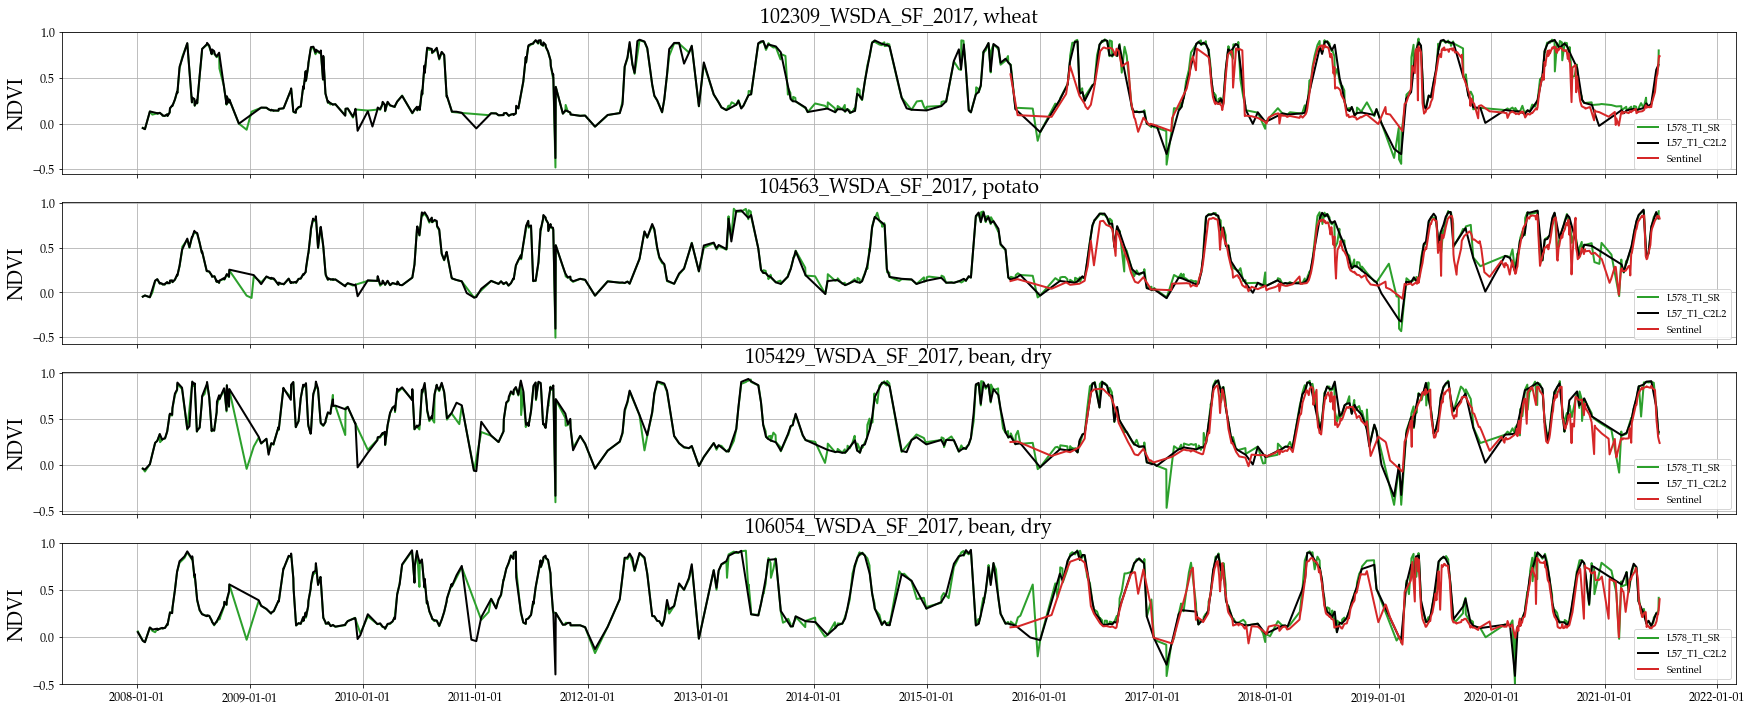

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(30, 12),
                        sharex='col', sharey='row',
                        # sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.2, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

dot_s = 80
#######
#######  subplot 1
#######
field_dt = all_data.loc[all_data.ID == unique_fields[0], ].copy()
for curr_dataset in np.sort(field_dt.dataset.unique()):
    curr_dt = field_dt.loc[field_dt.dataset == curr_dataset, ].copy()
    curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
    ax1.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], 
             '-', label = curr_dataset, linewidth=2, color=color_dict[curr_dataset]) #  ,
    if "T2" in curr_dataset:
        ax1.scatter(curr_dt['human_system_start_time'], 
                    curr_dt['NDVI'], 
                    color=color_dict[curr_dataset], 
                    s=dot_s)

ax1.set_title(field_dt.ID.unique()[0] + ", " + field_dt.CropTyp.unique()[0])
ax1.set_ylabel('NDVI') # , labelpad=20); # fontsize = label_FontSize,
ax1.tick_params(axis='y', which='major') 
ax1.tick_params(axis='x', which='major') 
ax1.legend(loc="lower right");

#######
#######  subplot 2
#######
field_dt = all_data.loc[all_data.ID == unique_fields[1], ].copy()
for curr_dataset in np.sort(field_dt.dataset.unique()):
    curr_dt = field_dt.loc[field_dt.dataset == curr_dataset, ].copy()
    curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
    ax2.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], 
             '-', label = curr_dataset, linewidth=2, color=color_dict[curr_dataset]) #  ,
    if "T2" in curr_dataset:
        ax2.scatter(curr_dt['human_system_start_time'], 
                    curr_dt['NDVI'], 
                    color=color_dict[curr_dataset], 
                    s=dot_s)
        

ax2.set_title(field_dt.ID.unique()[0] + ", " + field_dt.CropTyp.unique()[0])
ax2.set_ylabel('NDVI') # , labelpad=20); # fontsize = label_FontSize,
ax2.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax2.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax2.legend(loc="lower right");

#######
#######  subplot 3
#######
field_dt = all_data.loc[all_data.ID == unique_fields[2], ].copy()
for curr_dataset in np.sort(field_dt.dataset.unique()):
    curr_dt = field_dt.loc[field_dt.dataset == curr_dataset, ].copy()
    curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
    ax3.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], 
             '-', label = curr_dataset, linewidth=2, color=color_dict[curr_dataset])
    if "T2" in curr_dataset:
        ax3.scatter(curr_dt['human_system_start_time'], 
                    curr_dt['NDVI'], 
                    color=color_dict[curr_dataset], 
                    s=dot_s)


ax3.set_title(field_dt.ID.unique()[0] + ", " + field_dt.CropTyp.unique()[0])
ax3.set_ylabel('NDVI') # , labelpad=20); # fontsize = label_FontSize,
ax3.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax3.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax3.legend(loc="lower right");

#######
#######  subplot 4
#######
field_dt = all_data.loc[all_data.ID == unique_fields[3], ].copy()
for curr_dataset in np.sort(field_dt.dataset.unique()):
    curr_dt = field_dt.loc[field_dt.dataset == curr_dataset, ].copy()
    curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
    ax4.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], 
             '-', label = curr_dataset, linewidth=2, color=color_dict[curr_dataset])
    if "T2" in curr_dataset:
        ax4.scatter(curr_dt['human_system_start_time'], 
                    curr_dt['NDVI'], 
                    color=color_dict[curr_dataset], 
                    s=dot_s)


ax4.set_title(field_dt.ID.unique()[0] + ", " + field_dt.CropTyp.unique()[0])
ax4.set_ylabel('NDVI') # , labelpad=20); # fontsize = label_FontSize,
ax4.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax4.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax4.legend(loc="lower right");
ax4.xaxis.set_major_locator(mdates.YearLocator(1))


plt.ylim([-0.5, 1])

file_name = data_dir + "raw_figures/"+ "merged_Landsats_raw.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

# All Smoothed versions against each other with raw 

In [11]:
# composite = pd.read_csv(data_dir + 
#                        "L7_8day_NDVIComposite_2008-01-01_2021-07-01.csv")

# composite["dataset"] = "L7_8day_NDVIComposite"
# composite = composite[composite['NDVI'].notna()]
# composite = nc.add_human_start_time_by_system_start_time(composite)

# all_data = pd.concat([all_data, composite])
# all_data.head(2)

In [12]:
ID_list = list(np.sort(all_data.ID.unique()))
satellite_list = list(np.sort(all_data.dataset.unique()))
satellite_list

['L578_T1_SR', 'L57_T1_C2L2', 'Sentinel']

In [13]:
color_dict = {'Sentinel': '#d62728',
              'L57_T1_C2L2': 'k',
              'L578_T1_SR': '#2ca02c'
             }

In [14]:
satellite_list

['L578_T1_SR', 'L57_T1_C2L2', 'Sentinel']

In [15]:
color_dict

{'Sentinel': '#d62728', 'L57_T1_C2L2': 'k', 'L578_T1_SR': '#2ca02c'}

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


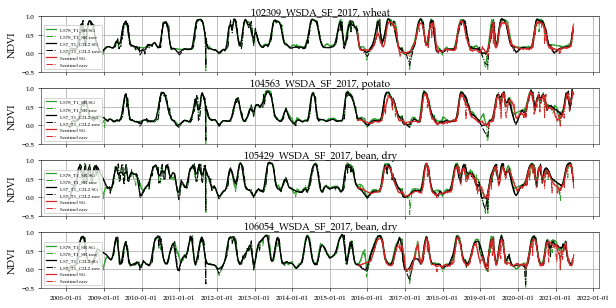

In [88]:

from IPython.display import clear_output
import pandas as pd
import time
%pylab inline --no-import-all
%load_ext autoreload

%autoreload
import NASA_core as nc
import NASA_plot_core as npc


size = 10
tickWidth = 0.6
tickLength = 3
params = {'legend.fontsize': size * 0.5,
          'figure.figsize': (10, 5),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.7,
          'ytick.labelsize': size * 0.7,
          'axes.titlepad': 2,
          'axes.linewidth' : 0.5,
          'xtick.major.size' : tickLength,
          'xtick.major.width': tickWidth, 
          'xtick.minor.size' : tickLength,
          'xtick.minor.width' : tickWidth,
          'ytick.major.size' : tickLength,
          'ytick.major.width': tickWidth, 
          'ytick.minor.size' : tickLength,
          'ytick.minor.width' : tickWidth,
          'legend.loc': 'lower left'}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True

plt.rcParams.update(params)

# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

### Set the colors
color_dict = {'Sentinel': '#d62728',
              'L57_T1_C2L2': 'k', # #8c564b
              'L5_T1_C2L2': '#ff7f0e',
              'L578_T1_SR': '#2ca02c'
             }

Lwidth = 1

fig, axs = plt.subplots(4, 1, sharex='col', sharey='row',
                        # sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.3, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)
############################
############################ Field 1
############################

###########
########### Satellite 1
###########
curr_dt = all_data[all_data.ID == ID_list[0]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[0]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax1, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax1.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])


###########
########### Satellite 2
###########
curr_dt = all_data[all_data.ID == ID_list[0]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[1]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax1, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax1.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

###########
########### Satellite 3
###########
curr_dt = all_data[all_data.ID == ID_list[0]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[2]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax1, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax1.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])
ax1.legend(loc="lower left");
############################
############################ Field 2
############################

###########
########### Satellite 1
###########

curr_dt = all_data[all_data.ID == ID_list[1]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[0]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax2, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax2.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

###########
########### Satellite 2
###########

curr_dt = all_data[all_data.ID == ID_list[1]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[1]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax2, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax2.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])
###########
########### Satellite 3
###########

curr_dt = all_data[all_data.ID == ID_list[1]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[2]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax2, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax2.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

ax2.legend(loc="lower left");

############################
############################ Field 3
############################

###########
########### Satellite 1
###########
curr_dt = all_data[all_data.ID == ID_list[2]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[0]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax3, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax3.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])
###########
########### Satellite 2
###########
curr_dt = all_data[all_data.ID == ID_list[2]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[1]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax3, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax3.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

###########
########### Satellite 3
###########

curr_dt = all_data[all_data.ID == ID_list[2]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[2]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax3, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax3.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

ax3.legend(loc="lower left");
############################
############################ Field 4
############################
###########
########### Satellite 1
###########
curr_dt = all_data[all_data.ID == ID_list[3]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[0]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax4, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax4.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

###########
########### Satellite 2
###########

curr_dt = all_data[all_data.ID == ID_list[3]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[1]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax4, color_dict=color_dict, idx=VI, time_step_size=interval_size)
ax4.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])

###########
########### Satellite 3
###########

curr_dt = all_data[all_data.ID == ID_list[3]].copy()
curr_dt = curr_dt[curr_dt.dataset==satellite_list[2]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.all_satellite_smoothed(raw_dt=curr_dt, ax=ax4, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax4.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], '-.', label=curr_dt.dataset.unique()[0] + " raw", 
         linewidth=Lwidth, color=color_dict[curr_dt.dataset.unique()[0]])
ax4.legend(loc="lower left");

file_name = data_dir + "raw_figures/"+ "00_merged_Landsats_Smoothed_and_raw.pdf"
plt.savefig(fname = file_name, dpi=400, transparent=False, bbox_inches='tight'); # 